# SMAI Assignment - 3

## Question - `3` : Knowing MLPs

| | |
|- | -|
| Course | Statistical Methods in AI |
| Release Date | `09.03.2023` |
| Due Date | `24.03.2023` |

## Please read the following before moving on

Welcome to the world of Multilayer Perceptrons (MLP)! You already know that MLPs are feedforward neural networks consisting of multiple layers of nodes or neurons. These networks are well-suited for a wide range of classification and regression tasks, thanks to their ability to learn complex, non-linear relationships between inputs and outputs.

In this assignment, we will be working with the MNIST dataset to explore the importance of different MLP components. The MNIST dataset consists of 70,000 handwritten digit images, each of which is 28x28 pixels in size. Our goal is to use an MLP to classify these images into one of 10 categories (0-9).

To improve the performance of our MLP, we will experiment with various techniques such as Dropout, Batch Normalization, Loss Functions, Stochastic batch and mini-batch gradient descent, and more. Please note, you must use mini-batch unless explicity specified.

In addition, we will experiment with different optimization algorithms such as stochastic gradient descent, Adam, and RMSprop to find the optimal weights and biases for our MLP. We will use stochastic batch and mini-batch gradient descent, which involve updating the weights and biases of the network based on a small batch of randomly sampled training examples, to speed up the training process and reduce memory usage.

By the end of this assignment, you will have gained a deeper understanding of the various components that make up an MLP and their importance in achieving high performance in classification tasks. You will have gained hands-on experience in experimenting with these components and learned how to fine-tune an MLP to achieve the best possible performance on the MNIST dataset. So, let's get started!

🫵Pro-tip: Do not re-write any results so as to re-use them in later experiments for tabulation and plotting.

💭Trivia: Did you know code written using ChatGPT is easy to catch?

### Step zero: Import Libraries

In [ ]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import torch
import torchvision
from torchvision import datasets
from torchvision import transforms
from torch.autograd import Variable
import torch.nn as nn

In [ ]:
from tqdm.auto import tqdm 

from sklearn.metrics import accuracy_score, f1_score

### Step one: Using a PyTorch Dataset
Load MNIST dataset from `torchvision.datasets`

In [ ]:
transform = transforms.Compose([
                    transforms.ToTensor(), 
            ])

trainset = torchvision.datasets.MNIST(root='./data', 
                                           train=True, 
                                           transform=transform,  
                                           download=True)
testset = torchvision.datasets.MNIST(root='./data', 
                                           train=False, 
                                           transform=transform)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
trainloader_minibatch = torch.utils.data.DataLoader(trainset, batch_size=100
                                                    , shuffle=True, num_workers=2)
trainloader_stochastic = torch.utils.data.DataLoader(trainset, batch_size=1
                                                     , shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(testset, batch_size=100
                                                     , shuffle=True, num_workers=2)

In [ ]:
pbar = tqdm(total=len(trainloader_minibatch))
for idx, (data,label) in enumerate(trainloader_minibatch):
    print(idx,data.size(),label.size())
    pbar.update(1)
    break
pbar.refresh()

  0%|          | 0/600 [00:00<?, ?it/s]

0 torch.Size([100, 1, 28, 28]) torch.Size([100])


True

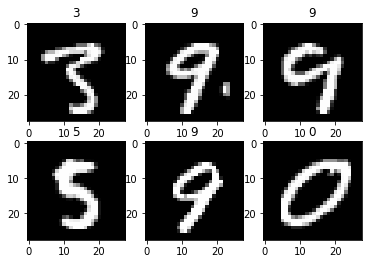

In [ ]:

examples = iter(trainloader_minibatch)
example_data,example_label = examples.__next__()
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(example_data[i][0], cmap='gray')
    plt.title(example_label[i].item())
plt.show()

### Step two: Define a MLP Model and without any bells and whitsles...
... along with a CrossEntropy loss criterion 

Do not use Dropout, BN or any other thing. Use ReLU for hidden layers.

⚠️ Do not use SoftMax in the output as nn.CrossEntropyLoss combines SoftMax and NLLLoss.

In [ ]:
class SimpleMLP(nn.Module):
    def __init__(self,input_size,hidden_size,output_size):
        super(SimpleMLP,self).__init__()
        self.l1 = nn.Linear(input_size,hidden_size)
        self.nl = nn.ReLU()
        self.l2 = nn.Linear(hidden_size,output_size)
        
    def forward(self,x):
        output = self.l1(x)
        output = self.nl(output)
        output = self.l2(output)
        return output



### Step three: Define the following optimizers using nn.optim
1. SGD
2. SGD with momentum
3. SGD with L2 regularization
4. RMSprop
5. Adam

In [ ]:
types = {0:"SGD",1:"SGD with momentum",2:"SGD with L2 regularization",3:"RMSprop",4:"Adam"}

In [ ]:
# Hyper-parameters 
input_size = 784 # 28x28
hidden_size = 500 
num_classes = 10
num_epochs = 10
learning_rate = 0.001

In [ ]:
# code here
# torch.manual_seed(1234)
model = SimpleMLP(input_size,hidden_size,num_classes)

models = []
for i in range(5):
    new_model = SimpleMLP(input_size,hidden_size,num_classes)
    new_model.load_state_dict(model.state_dict())
    models.append(new_model)

In [ ]:
list(models[0].parameters())[0]

Parameter containing:
tensor([[-0.0211,  0.0297,  0.0150,  ..., -0.0064, -0.0013,  0.0137],
        [ 0.0003, -0.0283, -0.0291,  ..., -0.0006,  0.0218, -0.0248],
        [-0.0295,  0.0096,  0.0274,  ...,  0.0275,  0.0070,  0.0243],
        ...,
        [ 0.0291,  0.0318,  0.0225,  ...,  0.0318,  0.0293, -0.0167],
        [-0.0356, -0.0021, -0.0227,  ..., -0.0348, -0.0164,  0.0220],
        [ 0.0320, -0.0141, -0.0121,  ..., -0.0334,  0.0098, -0.0334]],
       requires_grad=True)

In [ ]:
ops = [None] * 5
ops[0] = torch.optim.SGD(models[0].parameters(),lr=learning_rate)
ops[1] = torch.optim.SGD(models[1].parameters(),lr=learning_rate,momentum=0.001)
ops[2] = torch.optim.SGD(models[2].parameters(),lr=learning_rate,weight_decay=0.001)
ops[3] = torch.optim.RMSprop(models[3].parameters(),lr=learning_rate)
ops[4] = torch.optim.Adam(models[4].parameters(),lr=learning_rate)
criterion = nn.CrossEntropyLoss()

### Step four: Run the SimpleMLP using different optimizers and plot train and test loss for each optimizer.
Explain the results.

Report final accuracy, F1 score and other relavant metrics in a tabular form on test and train datasets.

In [19]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
device

device(type='cuda')

In [ ]:
for i in range(5): 
  models[i].to(device)

In [ ]:
# code, plots and explainiation here
def train(trainloader,mlp,op,type,sch=None):
  model.train()
  train_loss = []
  test_loss = []

  for epoch in range(num_epochs):
    out_loss = 0
    pbar = tqdm(total=len(trainloader))
    
    for i,(images,labels) in enumerate(trainloader):
      images = images.reshape(-1,28*28).to(device)
      labels = labels.to(device)

      outputs = mlp(images)
      
      loss = criterion(outputs,labels)
      out_loss += loss.item()
      loss.backward()
      
      op.step()
      op.zero_grad()
      
      pbar.update(1)
      pbar.desc= f'Loss: {loss.item()} Optim: {type}'

    if sch: 
      sch.step()


    train_loss.append(out_loss/len(trainloader))

    with torch.no_grad():
      out_loss=0

      for i,(images,labels) in enumerate(testloader):
        images = images.reshape(-1,28*28).to(device)
        labels = labels.to(device)
        
        outputs = mlp(images)
        loss = criterion(outputs,labels)
        out_loss += loss.item()
      
      test_loss.append(out_loss/len(testloader))
    
  pbar.refresh()
  pbar.close()
  return train_loss,test_loss
        

In [ ]:
def eval(model,loader):
  model.eval()
  predicted_labels = []
  true_labels = []
  with torch.no_grad():
    for i,(images,labels) in enumerate(loader):
      images = images.reshape(-1,28*28).to(device)
        
      outputs = model(images)
      _, predicted = torch.max(outputs, 1)
      true_labels.extend(labels.cpu().numpy())
      predicted_labels.extend(predicted.cpu().numpy()) 
      
  accuracy = accuracy_score(true_labels, predicted_labels)
  f1 = f1_score(true_labels, predicted_labels, average='weighted')
  return accuracy,f1

In [ ]:
def plot_losses(train_loss,test_loss,type):
  plt.plot(train_loss)
  plt.plot(test_loss)
  plt.xlabel('epochs')
  plt.ylabel('loss')
  plt.title(type)

In [ ]:
# Initialize empty lists for storing results
accuracies_train = [0] * 5
f1s_train = [0] * 5
accuracies_test = [0] * 5
f1s_test = [0] * 5
train_losses = [None] * 5
test_losses = [None] * 5

# Iterate over 5 models
for i in range(5):
    # Train the model and store the loss
    train_loss, test_loss = train(trainloader_minibatch,models[i], ops[i], types[i])
    train_losses[i] = train_loss
    test_losses[i] = test_loss
    
    # Evaluate the model on the test set and store the accuracy and F1 score
    acc, f1 = eval(models[i], testloader)
    accuracies_test[i] = acc
    f1s_test[i] = f1
    
    # Evaluate the model on the training set and store the accuracy and F1 score
    acc, f1 = eval(models[i], trainloader_minibatch)
    accuracies_train[i] = acc
    f1s_train[i] = f1


  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

In [ ]:
results = {"accuracies_train":accuracies_train,"f1s_train":f1s_train,"accuracies_test":accuracies_test,"f1s_test ":f1s_test}
df = pd.DataFrame(results)
df.set_index(pd.Index(list(types.values())))

,accuracies_train,f1s_train,accuracies_test,f1s_test
SGD,0.838867,0.836606,0.8447,0.841776
SGD with momentum,0.839917,0.837756,0.8455,0.842720
SGD with L2 regularization,0.838017,0.835642,0.8446,0.841515
RMSprop,0.998217,0.998216,0.9806,0.980611
Adam,0.997467,0.997468,0.9791,0.979111


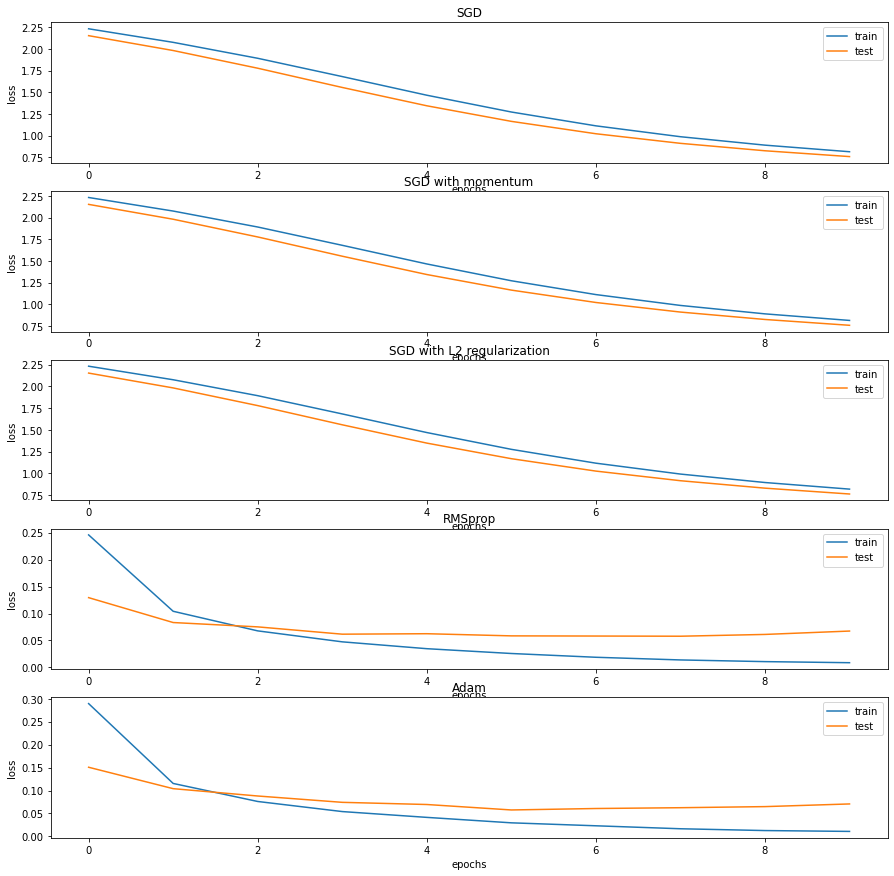

In [ ]:
fig,axes = plt.subplots(5,figsize=(15, 15))
epochs = list(range(0,num_epochs))
for i in range(5):
  axes[i].plot(epochs,train_losses[i],label="train")
  axes[i].plot(epochs,test_losses[i],label="test")
  axes[i].set_xlabel("epochs")
  axes[i].set_ylabel("loss")
  axes[i].set_title(types[i])
  axes[i].legend()

### Step five: Using SimpleMLP and Adam optimizer, train models using 2 different lr_schedulers.
Select 2 of **MultiplicativeLR**, **MultiStepLR**, **LinearLR** and **ExponentialLR**

Compare the results among different LR schedulers and the original model which didn't employ any LR scheduler. Compile results in a tabular form. Plot losses for each. Explain results.

In [ ]:
def compare(trainloader,models,ops,types,schs):
  n = len(models)
  accuracies_train = [0] * n
  f1s_train = [0] * n
  accuracies_test = [0] * n
  f1s_test = [0] * n
  train_losses = [None] * n
  test_losses = [None] * n
  
  

  # Iterate over 5 models
  for i in range(n):
      # Train the model and store the loss
      train_loss, test_loss = train(trainloader,models[i], ops[i], types[i],schs[i])
      train_losses[i] = train_loss
      test_losses[i] = test_loss
      
      # Evaluate the model on the test set and store the accuracy and F1 score
      acc, f1 = eval(models[i], testloader)
      accuracies_test[i] = acc
      f1s_test[i] = f1
      
      # Evaluate the model on the training set and store the accuracy and F1 score
      acc, f1 = eval(models[i], trainloader)
      accuracies_train[i] = acc
      f1s_train[i] = f1
  results = {
    "accuracies_train": accuracies_train,
    "f1s_train": f1s_train,
    "accuracies_test": accuracies_test,
    "f1s_test": f1s_test,
  }
  return train_losses,test_losses,results
    

In [ ]:
# code and analysis here

models_sch = []
for i in range(2):
    new_model = SimpleMLP(input_size,hidden_size,num_classes)
    new_model.load_state_dict(model.state_dict())
    new_model.to(device)
    models_sch.append(new_model)

ops_sch = [None]*2
ops_sch[0] = torch.optim.Adam(models_sch[0].parameters(),lr=learning_rate)
ops_sch[1] = torch.optim.Adam(models_sch[1].parameters(),lr=learning_rate)

schs = [None]*2
schs[0] = torch.optim.lr_scheduler.LinearLR(ops_sch[0])
schs[1] = torch.optim.lr_scheduler.ExponentialLR(ops_sch[1],gamma=0.8)

In [ ]:
types_sch = {0:"Linear",1:"Exponential"}
train_losses_sch,test_losses_sch,results_sch = compare(models_sch,ops_sch,types_sch,schs)

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

In [ ]:
df_sch = pd.DataFrame(results_sch)
df_sch.set_index(pd.Index(list(types_sch.values())))
  

,accuracies_train,f1s_train,accuracies_test,f1s_test
Linear,0.995583,0.995586,0.9791,0.979112
Exponential,0.997183,0.997183,0.9814,0.981402


In [ ]:
def plot_losses(train_losses,test_losses,types):
  n = len(train_losses)
  fig,axes = plt.subplots(n,figsize=(15, 15))
  epochs = list(range(0,num_epochs))
  for i in range(n):
    axes[i].plot(epochs,train_losses[i],label="train")
    axes[i].plot(epochs,test_losses[i],label="test")
    axes[i].set_xlabel("epochs")
    axes[i].set_ylabel("loss")
    axes[i].set_title(types[i])
    axes[i].legend()

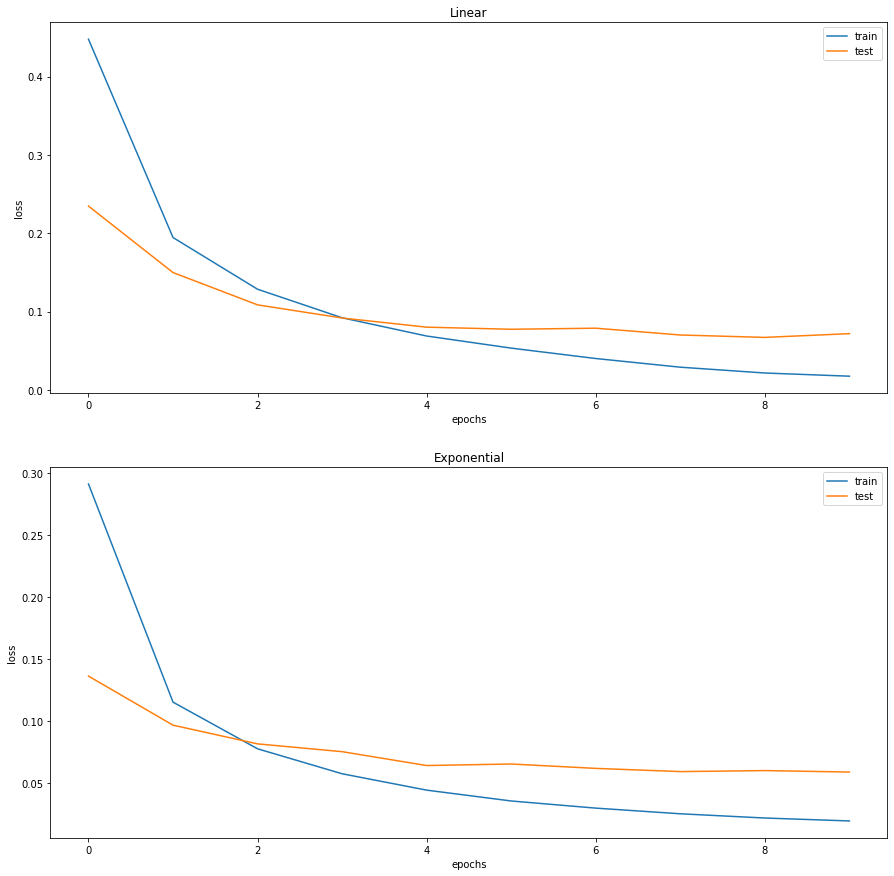

In [ ]:
plot_losses(train_losses_sch,test_losses_sch,types_sch)

### Step six: Define 3 models with following changes:
1. Add BatchNorm
2. Add Dropout
3. Add BatchNorm and Dropout

In [ ]:
# code here


### Step seven: Train the above models and compare with SimpleMLP.

Use your choice of optimizer, use no lr_scheduler so as to re-use the previous results.

Perform analysis. You've got the drill by now.

In [ ]:
# code here

### Step eight: Mini-batch vs Stocastic
Now that you might have a clear winner in your mind regarding which model and settings perform the best, train it on mini-batch and stocastic and compare time taken, loss curve, accuracy etc.

Perform an analysis like never before!

In [ ]:
# code here
model_stochastic = SimpleMLP(input_size,hidden_size,num_classes)
model_stochastic.load_state_dict(model.state_dict())
model_stochastic.to(device)
op_stochastic = torch.optim.Adam(model_stochastic.parameters(),lr=learning_rate)
sch_stochastic = torch.optim.lr_scheduler.ExponentialLR(op_stochastic,gamma=0.8)

train_loss, test_loss = train(trainloader_stochastic,model_stochastic, op_stochastic,"stochastic",sch_stochastic)

  0%|          | 0/60000 [00:00<?, ?it/s]

  0%|          | 0/60000 [00:00<?, ?it/s]

  0%|          | 0/60000 [00:00<?, ?it/s]

  0%|          | 0/60000 [00:00<?, ?it/s]

  0%|          | 0/60000 [00:00<?, ?it/s]

  0%|          | 0/60000 [00:00<?, ?it/s]

  0%|          | 0/60000 [00:00<?, ?it/s]

  0%|          | 0/60000 [00:00<?, ?it/s]

  0%|          | 0/60000 [00:00<?, ?it/s]

  0%|          | 0/60000 [00:00<?, ?it/s]

In [21]:
acc, f1 = eval(model_stochastic, testloader)
print(f"Test accuracy: {acc} f1 score: {f1}")
acc, f1 = eval(model_stochastic, trainloader_minibatch)
print(f"Train accuracy: {acc} f1 score: {f1}")

Test accuracy: 0.982 f1 score: 0.9820068738805833
Train accuracy: 0.9998666666666667 f1 score: 0.9998666650630007


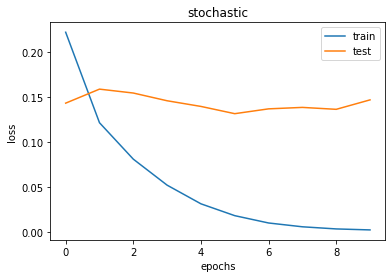

In [22]:
epochs = list(range(0,num_epochs))
plt.plot(epochs,train_loss)
plt.plot(epochs,test_loss)
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("stochastic")
plt.legend(["train","test"])

### And most importantly!!! What did we learn?
Discuss any and all learnings here. The discussions must be all-encompassing so that we know what did you learn. 

Please do not copy from your friend or copy-paste from the internet. We can see repetitions during evaluations.

1. How to implement MLPs
2. About different optimizers. Adam Optimizer works best for our case, quickly reaching minimum loss
3. Using different learning rate schedulers so that we don't have to use same learning rate. Linear scheduler linearly increases the learning rate over a defined number of training steps until it reaches its originally set learning rate. The Exponential scheduler reduces learning rate by a multiplicative factor at every training step. Exponential worked better than linear
4. Stochastic vs mini batch. Since, stochastic gradient descent updates parameters after every sample. It takes a lot of time